In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [13]:
# load data
fashion_mnist_data = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist_data.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
# convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, - 1)
x_train.shape

(60000, 28, 28, 1)

In [16]:
# number of classes
K = len(set(y_train))

In [21]:
# build the model
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [25]:
# compile and fit
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7018 - accuracy: 0.7441 - val_loss: 0.4048 - val_accuracy: 0.8493
Epoch 2/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3737 - accuracy: 0.8591 - val_loss: 0.3615 - val_accuracy: 0.8685
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3174 - accuracy: 0.8808 - val_loss: 0.3180 - val_accuracy: 0.8845
Epoch 4/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2780 - accuracy: 0.8951 - val_loss: 0.3096 - val_accuracy: 0.8849
Epoch 5/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2509 - accuracy: 0.9042 - val_loss: 0.2909 - val_accuracy: 0.8963
Epoch 6/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2360 - accuracy: 0.9105 - val_loss: 0.3036 - val_accuracy: 0.8919
Epoch 7/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2105 - accuracy: 0.9197 - val_loss: 0.2992 - val_ac

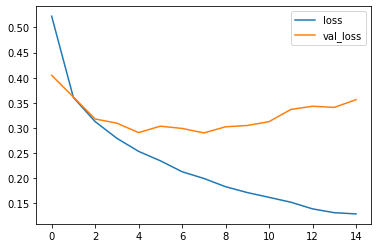

In [26]:
# plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

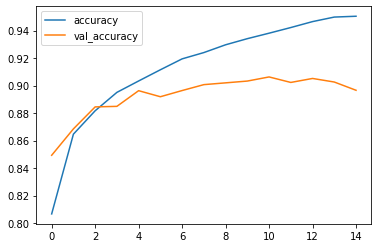

In [27]:
# plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[796   3  19  25   1   1 151   0   4   0]
 [  0 976   1  14   2   0   6   0   1   0]
 [ 14   0 817   9  34   0 125   0   1   0]
 [  8   3  15 903  28   0  42   0   1   0]
 [  0   1  51  21 791   0 136   0   0   0]
 [  0   0   0   2   0 972   0  19   1   6]
 [ 68   0  36  27  47   1 816   0   5   0]
 [  0   0   0   0   0  13   0 958   1  28]
 [  1   1   4   1   3   2  14   1 971   2]
 [  1   0   0   0   0   5   0  28   0 966]]


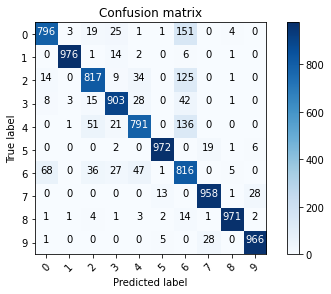

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
  
    print(cm)
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
  
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
  
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [29]:
# label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

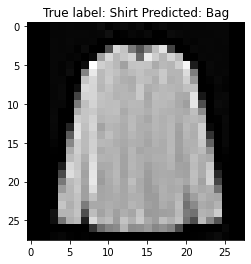

In [33]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));